# Extended Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import the libraries

In [2]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=a87127e96185cf3a56a75cf507d55a023b5e3b7594ace0cee0f84f7827a9b381
  Stored in directory: /root/.cache/pip/wheels/93/5b/a8/2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=4ff5efefd112600c18bc7f7cc3bd1deef6ea7f2cbbd299cc4da92fc1919073ce
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit adjustText


In [3]:
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import statsmodels.formula.api as sm

## FROM EDA: EXPLORATORY DATA ANALYSIS

#### Import the data

We are goint to import the cleaned dataset from the Residential Survey

In [4]:
residential_final= pd.read_csv('/content/drive/MyDrive/DS4A Team 14 - Fall 2022/EXTENDED ANALYSIS/Notebook/data/Copia de residential.csv', delimiter=',')
residential_final.shape

(51, 24)

In [5]:
residential_final.sample(5)

,state_name,region,state_fips,state_postal,total_homes,owned,rented,occupied,type_mobile_home,type_single_family_detached,...,year_made_1950_1959,year_made_1960_1969,year_made_1970_1979,year_made_1980_1989,year_made_1990_1999,year_made_2000_2009,year_made_2010_2015,year_made_2016_2020,use_solar_heating,energy_assistance
20,Maryland,SOUTH,24,MD,359,261,95,3,2,200,...,35,49,48,72,51,42,13,7,1,3
48,West Virginia,SOUTH,54,WV,197,154,38,5,28,137,...,25,16,37,28,19,27,11,4,0,3
31,New Mexico,WEST,35,NM,178,128,49,1,22,122,...,13,15,39,26,30,33,10,7,0,3
21,Massachusetts,NORTHEAST,25,MA,552,399,148,5,4,327,...,58,57,65,71,50,41,19,20,2,11
47,Washington,WEST,53,WA,439,300,138,1,28,296,...,30,38,69,36,72,67,29,33,1,4


In [6]:
residential_final.columns

Index(['state_name', 'region', 'state_fips', 'state_postal', 'total_homes',
       'owned', 'rented', 'occupied', 'type_mobile_home',
       'type_single_family_detached', 'type_single_family_attached',
       'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020', 'use_solar_heating',
       'energy_assistance'],
      dtype='object')

### 1- Distribution of residential features

#### Distribution of home ownership

In [7]:
total_homes=residential_final['total_homes'].sum()
home_owned_rate=residential_final['owned'].sum()/total_homes
home_rented_rate=residential_final['rented'].sum()/total_homes
home_occupied_rate=residential_final['occupied'].sum()/total_homes
home_ownership_rates_data = [['owned', home_owned_rate], ['rented', home_rented_rate], ['occupied', home_occupied_rate]]
home_ownership_rates= pd.DataFrame(home_ownership_rates_data, columns=['home_ownership', 'percentaje_homes'])
home_ownership_rates

,home_ownership,percentaje_homes
0,owned,0.727184
1,rented,0.262976
2,occupied,0.009840


#### Distribution of year made

In [8]:
year_home_rate_before_1950=residential_final['year_made_before_1950'].sum()/total_homes
year_home_rate_1950_1959=residential_final['year_made_1950_1959'].sum()/total_homes
year_home_rate_1960_1969=residential_final['year_made_1960_1969'].sum()/total_homes
year_home_rate_1970_1979=residential_final['year_made_1970_1979'].sum()/total_homes
year_home_rate_1980_1989=residential_final['year_made_1980_1989'].sum()/total_homes
year_home_rate_1990_1999=residential_final['year_made_1990_1999'].sum()/total_homes
year_home_rate_2000_2009=residential_final['year_made_2000_2009'].sum()/total_homes
year_home_rate_2010_2015=residential_final['year_made_2010_2015'].sum()/total_homes
year_home_rate_2016_2020=residential_final['year_made_2016_2020'].sum()/total_homes

  
year_home_rates_data = [['Before 1950',year_home_rate_before_1950],['1950-1959',year_home_rate_1950_1959],['1960-1969',year_home_rate_1960_1969],['1970-1979',year_home_rate_1970_1979],['1980-1989',year_home_rate_1980_1989],['1990-1999',year_home_rate_1990_1999],['2000-2009',year_home_rate_2000_2009],['2010-2015',year_home_rate_2010_2015],['2016-2020',year_home_rate_2016_2020]]

year_home_rates= pd.DataFrame(year_home_rates_data, columns=['year_built_homes', 'percentaje_homes'])
year_home_rates

,year_built_homes,percentaje_homes
0,Before 1950,0.147113
1,1950-1959,0.091101
2,1960-1969,0.100941
3,1970-1979,0.152303
4,1980-1989,0.131650
5,1990-1999,0.132515
6,2000-2009,0.148573
7,2010-2015,0.053471
8,2016-2020,0.042333


#### Distribution of type of home

Distribution of types of homes between: Mobile home, Single-family house detached from any other house,  Single-family house attached to one or more other houses (for example: duplex, row house, or townhome), Apartment in a building with 2 to 4 units and Apartment in a building with 5 or more units

In [9]:
type_mobile_home=residential_final['type_mobile_home'].sum()/total_homes
type_single_family_detached=residential_final['type_single_family_detached'].sum()/total_homes
type_single_family_attached=residential_final['type_single_family_attached'].sum()/total_homes
type_apartment_building_2_to_4_units=residential_final['type_apartment_building_2_to_4_units '].sum()/total_homes
type_apartment_building_more_5_units=residential_final['type_apartment_building_more_5_units'].sum()/total_homes
  
type_home_rates_data = [['Mobile home',type_mobile_home], ['Single family detached',type_single_family_detached], ['Single family attached',type_single_family_attached], ['Apartment in building with 2 to 4 units',type_apartment_building_2_to_4_units], ['Apartment in building with more than 5 units', type_apartment_building_more_5_units]]
type_home_rates= pd.DataFrame(type_home_rates_data, columns=['type_homes', 'percentaje_homes'])
type_home_rates

,type_homes,percentaje_homes
0,Mobile home,0.052660
1,Single family detached,0.666036
2,Single family attached,0.094669
3,Apartment in building with 2 to 4 units,0.054769
4,Apartment in building with more than 5 units,0.131866


### 2-Residential features across the states

To analize the diferences across the states, we convert the data in percentajes of the total of houses

In [10]:
residential_final_rates=residential_final.set_index('state_name')
columns = ['total_homes',
       'owned', 'rented', 'occupied', 'type_mobile_home',
       'type_single_family_detached', 'type_single_family_attached',
       'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020', 'use_solar_heating',
       'energy_assistance']
residential_final_rates[columns] = residential_final_rates[columns].div(residential_final_rates['total_homes'], axis=0)
residential_final_rates.head(5)

,region,state_fips,state_postal,total_homes,owned,rented,occupied,type_mobile_home,type_single_family_detached,type_single_family_attached,...,year_made_1950_1959,year_made_1960_1969,year_made_1970_1979,year_made_1980_1989,year_made_1990_1999,year_made_2000_2009,year_made_2010_2015,year_made_2016_2020,use_solar_heating,energy_assistance
state_name,,,,,,,,,,,,,,,,,,,,,
Alabama,SOUTH,1,AL,1.0,0.772727,0.210744,0.016529,0.136364,0.690083,0.045455,...,0.070248,0.107438,0.132231,0.140496,0.140496,0.194215,0.078512,0.024793,0.000000,0.004132
Alaska,WEST,2,AK,1.0,0.678457,0.299035,0.022508,0.038585,0.627010,0.163987,...,0.048232,0.057878,0.228296,0.250804,0.102894,0.183280,0.073955,0.025723,0.003215,0.028939
Arizona,WEST,4,AZ,1.0,0.751515,0.238384,0.010101,0.076768,0.711111,0.086869,...,0.040404,0.080808,0.155556,0.161616,0.181818,0.242424,0.052525,0.056566,0.008081,0.012121
Arkansas,SOUTH,5,AR,1.0,0.727612,0.250000,0.022388,0.089552,0.772388,0.055970,...,0.055970,0.126866,0.179104,0.167910,0.119403,0.164179,0.052239,0.044776,0.000000,0.014925
California,WEST,6,CA,1.0,0.632812,0.360243,0.006944,0.032986,0.608507,0.118056,...,0.132812,0.122396,0.184028,0.154514,0.106771,0.124132,0.031250,0.023438,0.002604,0.021701


### Relationship with Solar adoption 

### Import the data about solar adoption

We are going to import the dataset related ith solar adoption across the Satates in the US from the Solar Demographics tool by Berkeley lab

In [11]:
solar_adoption= pd.read_csv('/content/drive/MyDrive/DS4A Team 14 - Fall 2022/EXTENDED ANALYSIS/Notebook/data/Copia de all_states.csv', delimiter=',')
solar_adoption.head(5)

,Unnamed: 0,Year,state,bin_description,pct,N
0,1,2010,Arizona,Income bin: <$50k,13.5,476
1,2,2010,Arizona,Income bin: $50-100k,34.6,1219
2,3,2010,Arizona,Income bin: $100-150k,25.3,890
3,4,2010,Arizona,Income bin: $150k-$200k,10.9,383
4,5,2010,Arizona,Income bin: $200-250k,5.6,199


In [12]:
solar_adoption = solar_adoption.drop(columns = 'Unnamed: 0')

we pivot the table using as index the year and state and the values de N number of houses

In [13]:
solar_adoption_count= solar_adoption.pivot(index = ['Year', 'state'], columns = 'bin_description',  values='N')

We calculate the tolat number of solar adopters per year and state

In [14]:
solar_adoption_count['total_count']= solar_adoption_count['% of Poverty Level: 150-200%']+solar_adoption_count['% of Poverty Level: 200-250%']+solar_adoption_count['% of Poverty Level: 250-300%']+solar_adoption_count['% of Poverty Level: <150%']+solar_adoption_count['% of Poverty Level: >300%']+solar_adoption_count['% of Poverty Level: NA']
solar_adoption_count.head(5)

bin_description   % of Poverty Level: 150-200%  % of Poverty Level: 200-250%  \
Year state                                                                     
2010 Arizona                               176                           236   
     Arkansas                                6                             3   
     California                            892                           793   
     Colorado                               39                            47   
     Connecticut                            18                            21   

bin_description   % of Poverty Level: 250-300%  % of Poverty Level: <150%  \
Year state                                                                  
2010 Arizona                               281                        176   
     Arkansas                                5                          5   
     California                            963                        842   
     Colorado                               76                         74   
     Connecticut                            29                         18   

bin_description   % of Poverty Level: >300%  % of Poverty Level: NA  \
Year state                                                            
2010 Arizona                           2654                       0   
     Arkansas                            30                       0   
     California                       17078                       0   
     Colorado                          1340                       0   
     Connecticut                        372                       0   

bin_description   AMI Bin: 100-120%  AMI Bin: 60-80%  AMI Bin: 80-100%  \
Year state                                                               
2010 Arizona                    302              256               343   
     Arkansas                     5                4                 5   
     California                2215             1500              1891   
     Colorado                   183              120               143   
     Connecticut                 69               56                54   

bin_description   AMI Bin: <60%  ...  Income bin: $50-100k  Income bin: <$50k  \
Year state                       ...                                            
2010 Arizona                251  ...                  1219                476   
     Arkansas                 6  ...                    17                 15   
     California            2392  ...                  4960               1813   
     Colorado               130  ...                   404                128   
     Connecticut             45  ...                   137                 30   

bin_description   Income bin: >$250k  State Percentile: 0-20%  \
Year state                                                      
2010 Arizona                     356                       80   
     Arkansas                      1                        4   
     California                 4029                      381   
     Colorado                    252                       51   
     Connecticut                  58                       11   

bin_description   State Percentile: 20-40%  State Percentile: 40-60%  \
Year state                                                             
2010 Arizona                           225                       496   
     Arkansas                            3                         8   
     California                       1515                      2789   
     Colorado                           78                       182   
     Connecticut                        26                       105   

bin_description   State Percentile: 60-80%  State Percentile: 80-100%  \
Year state                                                              
2010 Arizona                           913                       1809   
     Arkansas                           14                         20   
     California                       4556                   

In [15]:
solar_adoption_count.columns

Index(['% of Poverty Level: 150-200%', '% of Poverty Level: 200-250%',
       '% of Poverty Level: 250-300%', '% of Poverty Level: <150%',
       '% of Poverty Level: >300%', '% of Poverty Level: NA',
       'AMI Bin: 100-120%', 'AMI Bin: 60-80%', 'AMI Bin: 80-100%',
       'AMI Bin: <60%', 'AMI Bin: >120%', 'AMI Bin: NA',
       'Adopter Income Bias: $0-50k', 'Adopter Income Bias: $50-100k',
       'Adopter Income Bias: -$50k-0', 'Adopter Income Bias: <-$50k',
       'Adopter Income Bias: >$100k', 'Adopter Income Bias: NA',
       'Income bin: $100-150k', 'Income bin: $150k-$200k',
       'Income bin: $200-250k', 'Income bin: $50-100k', 'Income bin: <$50k',
       'Income bin: >$250k', 'State Percentile: 0-20%',
       'State Percentile: 20-40%', 'State Percentile: 40-60%',
       'State Percentile: 60-80%', 'State Percentile: 80-100%',
       'State Percentile: NA', 'total_count'],
      dtype='object', name='bin_description')

In [16]:
solar_adoption_final=solar_adoption_count.reset_index()
solar_adoption_final=solar_adoption_final[['Year','state','total_count','Income bin: $100-150k', 'Income bin: $150k-$200k',
       'Income bin: $200-250k', 'Income bin: $50-100k', 'Income bin: <$50k',
       'Income bin: >$250k']]
solar_adoption_final

bin_description,Year,state,total_count,Income bin: $100-150k,Income bin: $150k-$200k,Income bin: $200-250k,Income bin: $50-100k,Income bin: <$50k,Income bin: >$250k
0,2010,Arizona,3523,890,383,199,1219,476,356
1,2010,Arkansas,49,12,1,3,17,15,1
2,2010,California,20568,4436,2912,2418,4960,1813,4029
3,2010,Colorado,1576,362,253,177,404,128,252
4,2010,Connecticut,458,143,47,43,137,30,58
...,...,...,...,...,...,...,...,...,...
479,2021,Utah,6162,1713,654,257,2608,620,310
480,2021,Vermont,1020,231,110,59,398,134,88
481,2021,Virginia,7419,1957,1094,665,2179,760,764
482,2021,Washington,5734,1501,749,459,1975,503,547


We are going to filter the data for year 2020 to compare with the residential dataset

Calculate solar adoption rate per state

(Here we pulled the income bin from the solar demographics data since it correpsonds to the adoption rate. We don't have to use the incom data from here but at this point it's easier)

In [17]:
solar_adoption_2020=solar_adoption_final[solar_adoption_final['Year'] == 2020]
solar_adoption_2020=solar_adoption_2020.groupby(['state','Income bin: $100-150k', 'Income bin: $150k-$200k',
        'Income bin: $200-250k', 'Income bin: $50-100k', 'Income bin: <$50k'])['total_count'].sum().to_frame()
solar_adoption_2020=solar_adoption_2020.reset_index()
solar_adoption_2020=solar_adoption_2020.set_index('state')
solar_adoption_2020.head()

,Income bin: $100-150k,Income bin: $150k-$200k,Income bin: $200-250k,Income bin: $50-100k,Income bin: <$50k,total_count
state,,,,,,
Arizona,3995,1660,765,7571,3095,18315
Arkansas,39,18,7,75,23,182
California,34595,21738,13413,38836,14883,141868
Colorado,3494,1772,875,4057,1031,12276
Connecticut,1897,744,425,2226,969,6765


### Import the data about housing unit

Impor the data of housing unis per state por Census

In [18]:
residential_final_rates.head()

,region,state_fips,state_postal,total_homes,owned,rented,occupied,type_mobile_home,type_single_family_detached,type_single_family_attached,...,year_made_1950_1959,year_made_1960_1969,year_made_1970_1979,year_made_1980_1989,year_made_1990_1999,year_made_2000_2009,year_made_2010_2015,year_made_2016_2020,use_solar_heating,energy_assistance
state_name,,,,,,,,,,,,,,,,,,,,,
Alabama,SOUTH,1,AL,1.0,0.772727,0.210744,0.016529,0.136364,0.690083,0.045455,...,0.070248,0.107438,0.132231,0.140496,0.140496,0.194215,0.078512,0.024793,0.000000,0.004132
Alaska,WEST,2,AK,1.0,0.678457,0.299035,0.022508,0.038585,0.627010,0.163987,...,0.048232,0.057878,0.228296,0.250804,0.102894,0.183280,0.073955,0.025723,0.003215,0.028939
Arizona,WEST,4,AZ,1.0,0.751515,0.238384,0.010101,0.076768,0.711111,0.086869,...,0.040404,0.080808,0.155556,0.161616,0.181818,0.242424,0.052525,0.056566,0.008081,0.012121
Arkansas,SOUTH,5,AR,1.0,0.727612,0.250000,0.022388,0.089552,0.772388,0.055970,...,0.055970,0.126866,0.179104,0.167910,0.119403,0.164179,0.052239,0.044776,0.000000,0.014925
California,WEST,6,CA,1.0,0.632812,0.360243,0.006944,0.032986,0.608507,0.118056,...,0.132812,0.122396,0.184028,0.154514,0.106771,0.124132,0.031250,0.023438,0.002604,0.021701


In [19]:
housing_units= pd.read_csv('/content/drive/MyDrive/DS4A Team 14 - Fall 2022/EXTENDED ANALYSIS/Notebook/data/Copia de housing_units.csv', delimiter=';')
housing_units=housing_units.set_index('State')
housing_units['Housing unit']=housing_units['Housing unit'].astype(float)
housing_units

,Housing unit
State,
Alabama,2288330.0
Alaska,326200.0
Arizona,3082000.0
Arkansas,1365265.0
California,14392140.0
Colorado,2491404.0
Connecticut,1530197.0
Delaware,448735.0
District of Columbia,350364.0


# Trying to incorporate income here:

Import the income data

In [20]:
income= pd.read_csv('/content/drive/MyDrive/DS4A Team 14 - Fall 2022/EXTENDED ANALYSIS/Notebook/data/census_income_2020.csv', delimiter=',')
income.head(5)

,Unnamed: 0,state,median_income,mean_income,percent_poverty,median_gross_rent
0,0,alabama,52035.0,71964.0,16.0,811.0
1,1,alaska,77790.0,98811.0,10.3,1240.0
2,2,arizona,61529.0,84380.0,14.1,1097.0
3,3,arkansas,49475.0,69357.0,16.1,760.0
4,4,california,78672.0,111622.0,12.6,1586.0


Change the names of the states

In [21]:
income['state'] = income['state'].str.title()
income=income.set_index('state')
income

,Unnamed: 0,median_income,mean_income,percent_poverty,median_gross_rent
state,,,,,
Alabama,0,52035.0,71964.0,16.0,811.0
Alaska,1,77790.0,98811.0,10.3,1240.0
Arizona,2,61529.0,84380.0,14.1,1097.0
Arkansas,3,49475.0,69357.0,16.1,760.0
California,4,78672.0,111622.0,12.6,1586.0
Colorado,5,75231.0,100933.0,9.8,1335.0
Connecticut,6,79855.0,115337.0,9.8,1201.0
Delaware,7,69110.0,92308.0,11.4,1150.0
Florida,8,57703.0,83104.0,13.3,1218.0


In [22]:
income.shape

(50, 5)

### Join the data wih the residetial dataset solar adopters housing units per state and income

In [23]:
result = pd.concat([residential_final_rates, solar_adoption_2020, housing_units,income], axis=1)
result

,region,state_fips,state_postal,total_homes,owned,rented,occupied,type_mobile_home,type_single_family_detached,type_single_family_attached,...,Income bin: $200-250k,Income bin: $50-100k,Income bin: <$50k,total_count,Housing unit,Unnamed: 0,median_income,mean_income,percent_poverty,median_gross_rent
Alabama,SOUTH,1.0,AL,1.0,0.772727,0.210744,0.016529,0.136364,0.690083,0.045455,...,NaN,NaN,NaN,NaN,2288330.0,0.0,52035.0,71964.0,16.0,811.0
Alaska,WEST,2.0,AK,1.0,0.678457,0.299035,0.022508,0.038585,0.627010,0.163987,...,NaN,NaN,NaN,NaN,326200.0,1.0,77790.0,98811.0,10.3,1240.0
Arizona,WEST,4.0,AZ,1.0,0.751515,0.238384,0.010101,0.076768,0.711111,0.086869,...,765.0,7571.0,3095.0,18315.0,3082000.0,2.0,61529.0,84380.0,14.1,1097.0
Arkansas,SOUTH,5.0,AR,1.0,0.727612,0.250000,0.022388,0.089552,0.772388,0.055970,...,7.0,75.0,23.0,182.0,1365265.0,3.0,49475.0,69357.0,16.1,760.0
California,WEST,6.0,CA,1.0,0.632812,0.360243,0.006944,0.032986,0.608507,0.118056,...,13413.0,38836.0,14883.0,141868.0,14392140.0,4.0,78672.0,111622.0,12.6,1586.0
Colorado,WEST,8.0,CO,1.0,0.722222,0.277778,0.000000,0.050000,0.675000,0.094444,...,875.0,4057.0,1031.0,12276.0,2491404.0,5.0,75231.0,100933.0,9.8,1335.0
Connecticut,NORTHEAST,9.0,CT,1.0,0.772109,0.221088,0.006803,0.010204,0.683673,0.102041,...,425.0,2226.0,969.0,6765.0,1530197.0,6.0,79855.0,115337.0,9.8,1201.0
Delaware,SOUTH,10.0,DE,1.0,0.783217,0.209790,0.006993,0.090909,0.664336,0.125874,...,2.0,7.0,5.0,33.0,448735.0,7.0,69110.0,92308.0,11.4,1150.0
District of Columbia,SOUTH,11.0,DC,1.0,0.407240,0.588235,0.004525,0.000000,0.095023,0.271493,...,225.0,544.0,215.0,1997.0,350364.0,NaN,NaN,NaN,NaN,NaN
Florida,SOUTH,12.0,FL,1.0,0.731298,0.259542,0.009160,0.061069,0.622901,0.093130,...,979.0,10357.0,5175.0,25970.0,9865350.0,8.0,57703.0,83104.0,13.3,1218.0


In [24]:
result.shape

(52, 35)

In [25]:
result_new= result.dropna().copy()
result_new.head(5)

,region,state_fips,state_postal,total_homes,owned,rented,occupied,type_mobile_home,type_single_family_detached,type_single_family_attached,...,Income bin: $200-250k,Income bin: $50-100k,Income bin: <$50k,total_count,Housing unit,Unnamed: 0,median_income,mean_income,percent_poverty,median_gross_rent
Arizona,WEST,4.0,AZ,1.0,0.751515,0.238384,0.010101,0.076768,0.711111,0.086869,...,765.0,7571.0,3095.0,18315.0,3082000.0,2.0,61529.0,84380.0,14.1,1097.0
Arkansas,SOUTH,5.0,AR,1.0,0.727612,0.250000,0.022388,0.089552,0.772388,0.055970,...,7.0,75.0,23.0,182.0,1365265.0,3.0,49475.0,69357.0,16.1,760.0
California,WEST,6.0,CA,1.0,0.632812,0.360243,0.006944,0.032986,0.608507,0.118056,...,13413.0,38836.0,14883.0,141868.0,14392140.0,4.0,78672.0,111622.0,12.6,1586.0
Colorado,WEST,8.0,CO,1.0,0.722222,0.277778,0.000000,0.050000,0.675000,0.094444,...,875.0,4057.0,1031.0,12276.0,2491404.0,5.0,75231.0,100933.0,9.8,1335.0
Connecticut,NORTHEAST,9.0,CT,1.0,0.772109,0.221088,0.006803,0.010204,0.683673,0.102041,...,425.0,2226.0,969.0,6765.0,1530197.0,6.0,79855.0,115337.0,9.8,1201.0


In [26]:
result_new.shape

(42, 35)

In [27]:
result_new['total_solar_adoption_rate']=result_new['total_count']/result_new['Housing unit']
result_new['<$50k solar_adoption_rate']=result_new['Income bin: <$50k']/result_new['Housing unit']
result_new['$50-100k solar_adoption_rate']=result_new['Income bin: $50-100k']/result_new['Housing unit']
result_new['$100-150k solar_adoption_rate']=result_new['Income bin: $100-150k']/result_new['Housing unit']
result_new['$150k-$200k solar_adoption_rate']=result_new['Income bin: $150k-$200k']/result_new['Housing unit']
result_new['$200-250k solar_adoption_rate']=result_new['Income bin: $200-250k']/result_new['Housing unit']
result_new.head(5)

,region,state_fips,state_postal,total_homes,owned,rented,occupied,type_mobile_home,type_single_family_detached,type_single_family_attached,...,median_income,mean_income,percent_poverty,median_gross_rent,total_solar_adoption_rate,<$50k solar_adoption_rate,$50-100k solar_adoption_rate,$100-150k solar_adoption_rate,$150k-$200k solar_adoption_rate,$200-250k solar_adoption_rate
Arizona,WEST,4.0,AZ,1.0,0.751515,0.238384,0.010101,0.076768,0.711111,0.086869,...,61529.0,84380.0,14.1,1097.0,0.005943,0.001004,0.002457,0.001296,0.000539,0.000248
Arkansas,SOUTH,5.0,AR,1.0,0.727612,0.250000,0.022388,0.089552,0.772388,0.055970,...,49475.0,69357.0,16.1,760.0,0.000133,0.000017,0.000055,0.000029,0.000013,0.000005
California,WEST,6.0,CA,1.0,0.632812,0.360243,0.006944,0.032986,0.608507,0.118056,...,78672.0,111622.0,12.6,1586.0,0.009857,0.001034,0.002698,0.002404,0.001510,0.000932
Colorado,WEST,8.0,CO,1.0,0.722222,0.277778,0.000000,0.050000,0.675000,0.094444,...,75231.0,100933.0,9.8,1335.0,0.004927,0.000414,0.001628,0.001402,0.000711,0.000351
Connecticut,NORTHEAST,9.0,CT,1.0,0.772109,0.221088,0.006803,0.010204,0.683673,0.102041,...,79855.0,115337.0,9.8,1201.0,0.004421,0.000633,0.001455,0.001240,0.000486,0.000278


In [28]:
result_new.columns

Index(['region', 'state_fips', 'state_postal', 'total_homes', 'owned',
       'rented', 'occupied', 'type_mobile_home', 'type_single_family_detached',
       'type_single_family_attached', 'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020', 'use_solar_heating',
       'energy_assistance', 'Income bin: $100-150k', 'Income bin: $150k-$200k',
       'Income bin: $200-250k', 'Income bin: $50-100k', 'Income bin: <$50k',
       'total_count', 'Housing unit', 'Unnamed: 0', 'median_income',
       'mean_income', 'percent_poverty', 'median_gross_rent',
       'total_solar_adoption_rate', '<$50k solar_adoption_rate',
       '$50-100k solar_adoption_rate', '$100-150k solar_adoption_rate',
       '$150k-$200k solar_adoption_rate', '$200

In [29]:
result_new=result_new[['region', 'owned',
       'rented', 'occupied', 'type_mobile_home', 'type_single_family_detached',
       'type_single_family_attached', 'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020', 'use_solar_heating',
       'energy_assistance', 'median_income',
       'percent_poverty', 'median_gross_rent', 'total_solar_adoption_rate',
       '<$50k solar_adoption_rate', '$50-100k solar_adoption_rate',
       '$100-150k solar_adoption_rate', '$150k-$200k solar_adoption_rate',
       '$200-250k solar_adoption_rate']]

#### Analysis of Income bin

In [30]:
result_new[[
       '<$50k solar_adoption_rate', '$50-100k solar_adoption_rate',
       '$100-150k solar_adoption_rate', '$150k-$200k solar_adoption_rate',
       '$200-250k solar_adoption_rate','total_solar_adoption_rate']].head()


,<$50k solar_adoption_rate,$50-100k solar_adoption_rate,$100-150k solar_adoption_rate,$150k-$200k solar_adoption_rate,$200-250k solar_adoption_rate,total_solar_adoption_rate
Arizona,0.001004,0.002457,0.001296,0.000539,0.000248,0.005943
Arkansas,0.000017,0.000055,0.000029,0.000013,0.000005,0.000133
California,0.001034,0.002698,0.002404,0.001510,0.000932,0.009857
Colorado,0.000414,0.001628,0.001402,0.000711,0.000351,0.004927
Connecticut,0.000633,0.001455,0.001240,0.000486,0.000278,0.004421


Text(0.5, 1.0, 'Solar adoption rate')

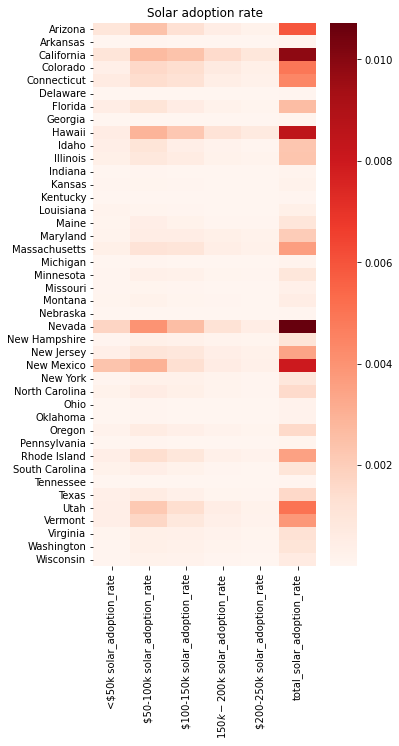

In [31]:
fig, ax = plt.subplots(figsize=(5, 10))
ax= sns.heatmap(result_new[[
       '<$50k solar_adoption_rate', '$50-100k solar_adoption_rate',
       '$100-150k solar_adoption_rate', '$150k-$200k solar_adoption_rate',
       '$200-250k solar_adoption_rate','total_solar_adoption_rate']], cmap="Reds")
ax.set_title("Solar adoption rate")

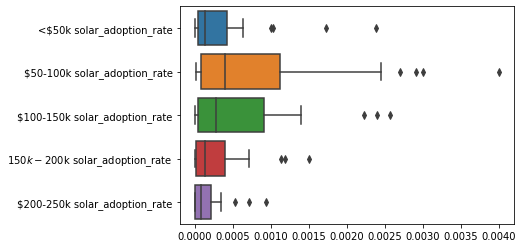

In [32]:
sns.boxplot(data=result_new[[
       '<$50k solar_adoption_rate', '$50-100k solar_adoption_rate',
       '$100-150k solar_adoption_rate', '$150k-$200k solar_adoption_rate',
       '$200-250k solar_adoption_rate']], orient = 'h')

In [33]:
result_new[[
       '<$50k solar_adoption_rate', '$50-100k solar_adoption_rate',
       '$100-150k solar_adoption_rate', '$150k-$200k solar_adoption_rate',
       '$200-250k solar_adoption_rate']].describe()

,<$50k solar_adoption_rate,$50-100k solar_adoption_rate,$100-150k solar_adoption_rate,$150k-$200k solar_adoption_rate,$200-250k solar_adoption_rate
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.000322,0.000829,0.000560,0.000261,0.000143
std,0.000473,0.000993,0.000678,0.000347,0.000198
min,0.000008,0.000016,0.000006,0.000002,0.000002
25%,0.000043,0.000079,0.000044,0.000018,0.000008
50%,0.000131,0.000399,0.000287,0.000131,0.000078
75%,0.000421,0.001122,0.000906,0.000393,0.000216
max,0.002381,0.004006,0.002564,0.001510,0.000932


In [34]:

adoption_income = result_new[[
       '<$50k solar_adoption_rate', '$50-100k solar_adoption_rate',
       '$100-150k solar_adoption_rate', '$150k-$200k solar_adoption_rate',
       '$200-250k solar_adoption_rate']]
# adoption_income = adoption_income.reset_index()
# adoption_income.rename(columns={'index':'State'},inplace=True)
adoption_income

,<$50k solar_adoption_rate,$50-100k solar_adoption_rate,$100-150k solar_adoption_rate,$150k-$200k solar_adoption_rate,$200-250k solar_adoption_rate
Arizona,0.001004,0.002457,0.001296,0.000539,0.000248
Arkansas,0.000017,0.000055,0.000029,0.000013,0.000005
California,0.001034,0.002698,0.002404,0.001510,0.000932
Colorado,0.000414,0.001628,0.001402,0.000711,0.000351
Connecticut,0.000633,0.001455,0.001240,0.000486,0.000278
Delaware,0.000011,0.000016,0.000018,0.000020,0.000004
Florida,0.000525,0.001050,0.000585,0.000220,0.000099
Georgia,0.000015,0.000035,0.000022,0.000013,0.000007
Hawaii,0.000583,0.002918,0.002233,0.001137,0.000715
Idaho,0.000426,0.001088,0.000451,0.000173,0.000061


#### Correlation

In [35]:
corr_df=result_new[['region', 'owned',
       'rented', 'occupied', 'type_mobile_home', 'type_single_family_detached',
       'type_single_family_attached', 'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020', 'use_solar_heating',
       'energy_assistance', 'median_income',
       'percent_poverty', 'median_gross_rent', 'total_solar_adoption_rate',
       '<$50k solar_adoption_rate', '$50-100k solar_adoption_rate',
       '$100-150k solar_adoption_rate', '$150k-$200k solar_adoption_rate',
       '$200-250k solar_adoption_rate']]

In [36]:
corr_df2=result_new[['region', 'owned',
       'rented', 'occupied', 'type_mobile_home', 'type_single_family_detached',
       'type_single_family_attached', 'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'use_solar_heating',
       'energy_assistance', 'median_income',
       'percent_poverty', 'median_gross_rent', 'total_solar_adoption_rate',
       '<$50k solar_adoption_rate', '$50-100k solar_adoption_rate',
       '$100-150k solar_adoption_rate', '$150k-$200k solar_adoption_rate',
       '$200-250k solar_adoption_rate']]

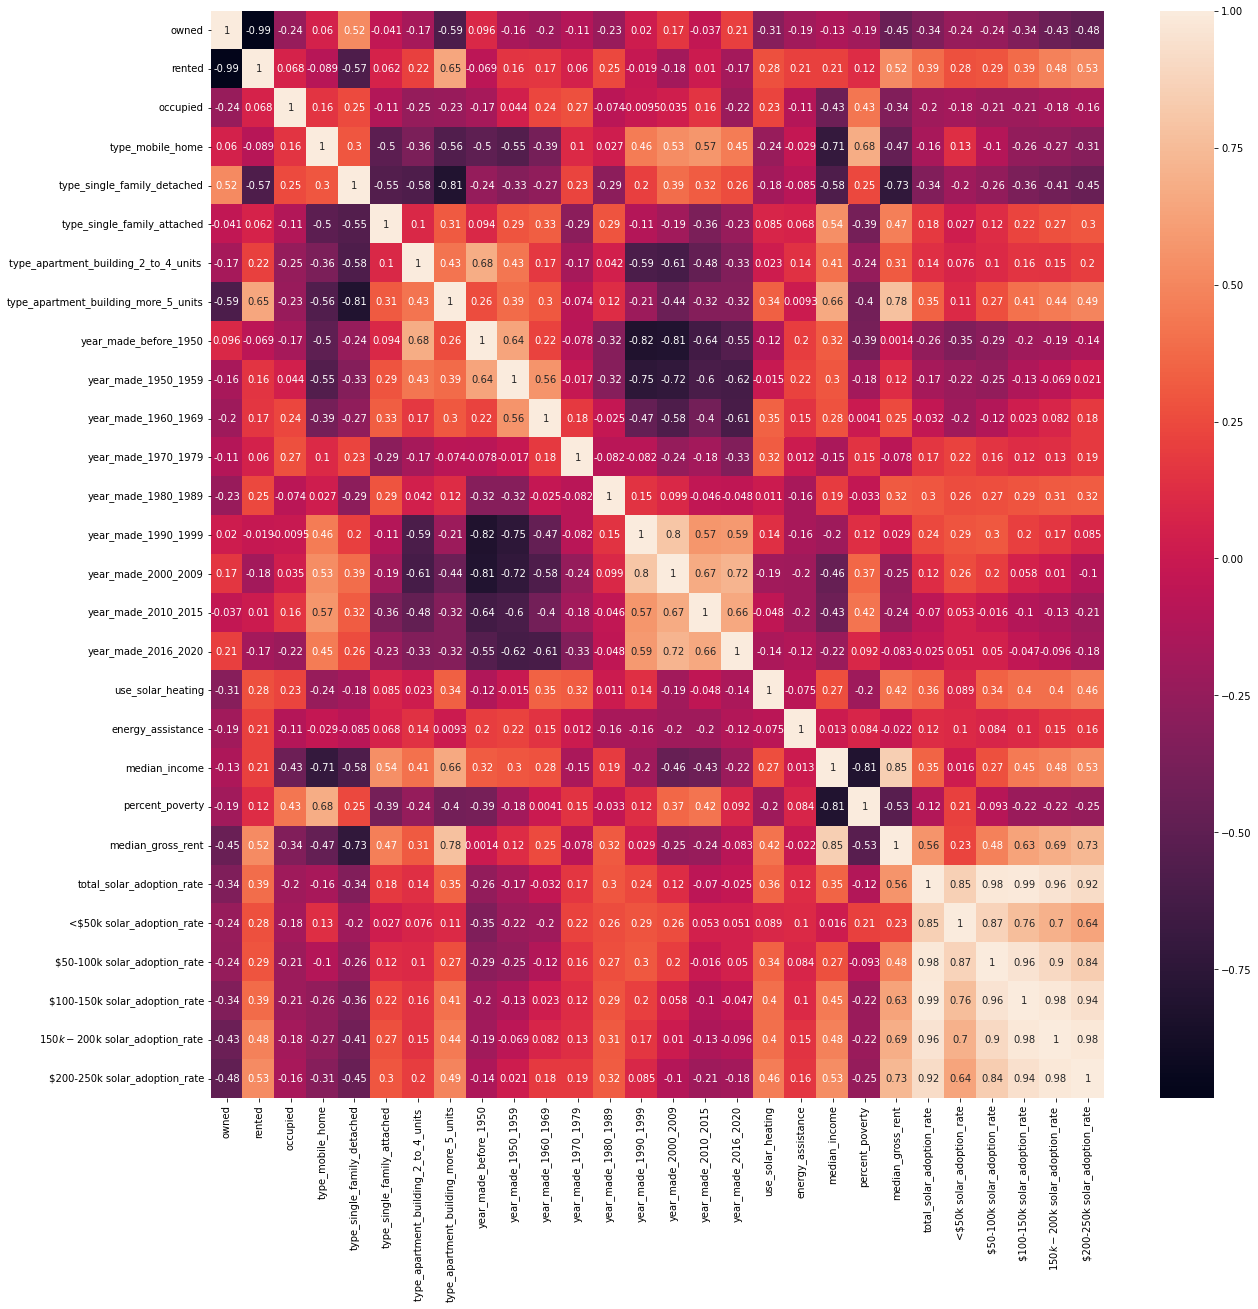

In [37]:
corr = corr_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()

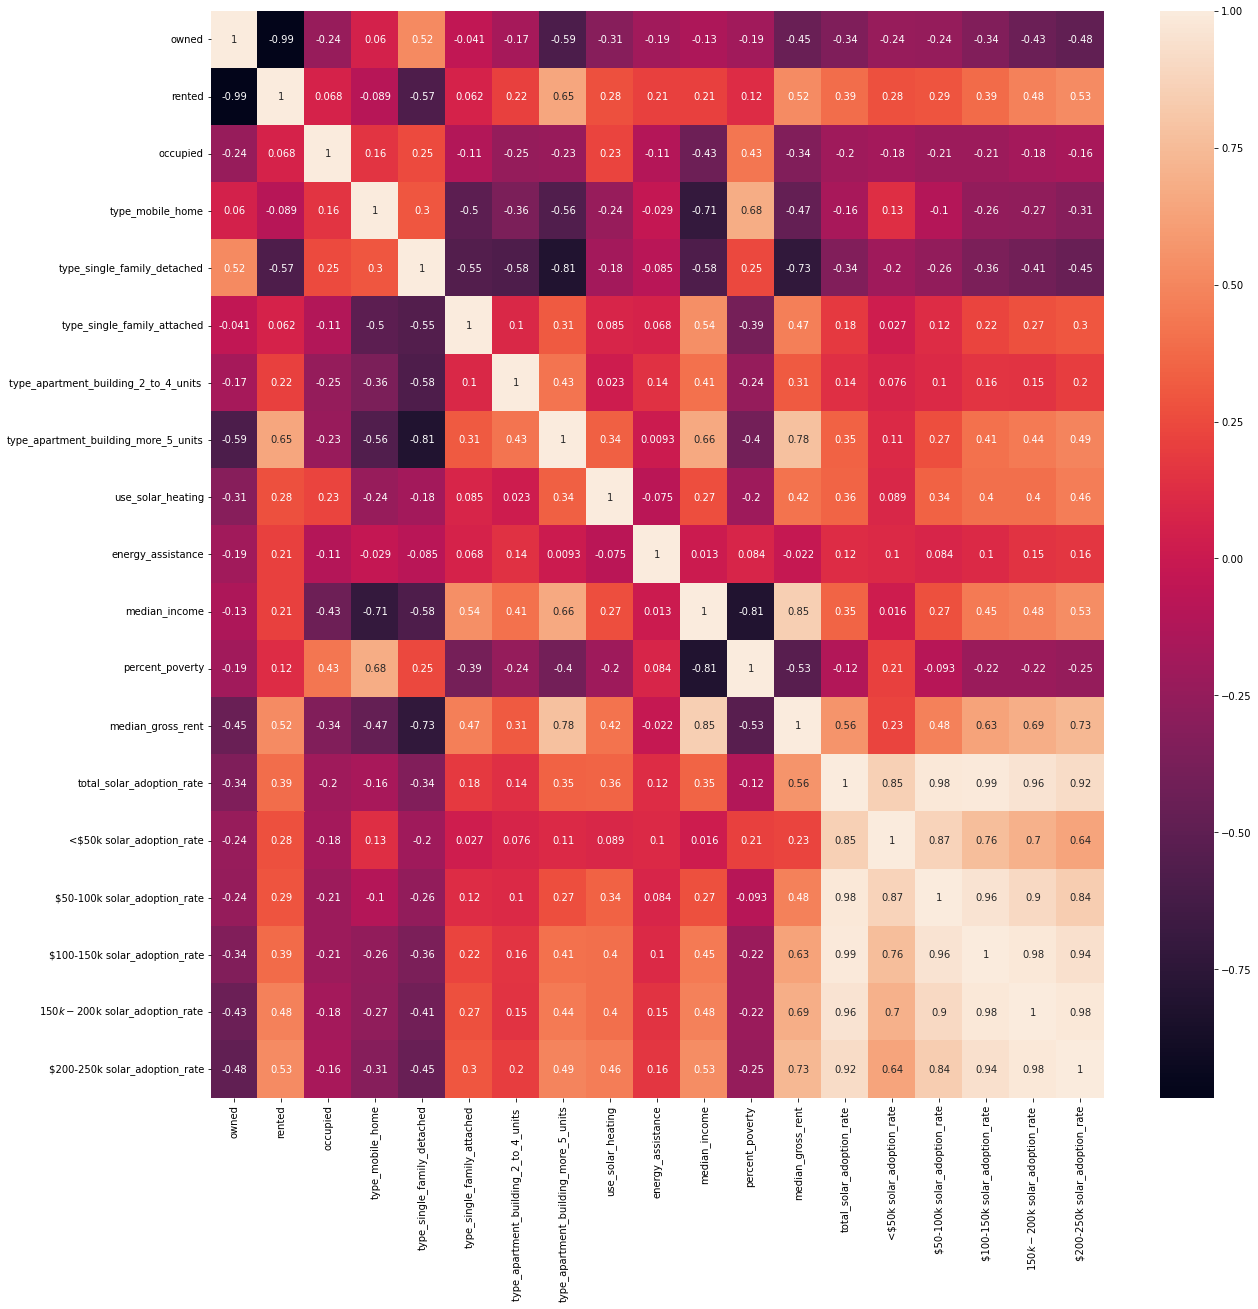

In [38]:
corr2 = corr_df2.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr2, annot=True)
plt.show()

## Multiple linear regression

The steps to run these regressions in `statsmodels` 

This is one of the models:

$$ TOTAL SOLAR ADOPTION RATE= \beta_0 + \beta_1 Ratio of house owned + \beta_6 Median income  +  \beta_9 Ratio of houses type single family detached $$


$$ TOTAL SOLAR ADOPTION RATE= \beta_0 + \beta_1 Ratio of house rented  + \beta_8 Median gross rent +  \beta_9 Ratio of houses type single family detached + \beta_10 Ratio of housestype single family attached  + \beta_11 Ratio of housestype_apartment building 2 to 4 units + \beta_12 Ratio of housestype apartment building more 5 units $$
 
The corresponding `statsmodels` formula would be:

In [39]:
df=result_new.reset_index()

In [40]:
df.head()

,index,region,owned,rented,occupied,type_mobile_home,type_single_family_detached,type_single_family_attached,type_apartment_building_2_to_4_units,type_apartment_building_more_5_units,...,energy_assistance,median_income,percent_poverty,median_gross_rent,total_solar_adoption_rate,<$50k solar_adoption_rate,$50-100k solar_adoption_rate,$100-150k solar_adoption_rate,$150k-$200k solar_adoption_rate,$200-250k solar_adoption_rate
0,Arizona,WEST,0.751515,0.238384,0.010101,0.076768,0.711111,0.086869,0.028283,0.096970,...,0.012121,61529.0,14.1,1097.0,0.005943,0.001004,0.002457,0.001296,0.000539,0.000248
1,Arkansas,SOUTH,0.727612,0.250000,0.022388,0.089552,0.772388,0.055970,0.029851,0.052239,...,0.014925,49475.0,16.1,760.0,0.000133,0.000017,0.000055,0.000029,0.000013,0.000005
2,California,WEST,0.632812,0.360243,0.006944,0.032986,0.608507,0.118056,0.060764,0.179688,...,0.021701,78672.0,12.6,1586.0,0.009857,0.001034,0.002698,0.002404,0.001510,0.000932
3,Colorado,WEST,0.722222,0.277778,0.000000,0.050000,0.675000,0.094444,0.027778,0.152778,...,0.013889,75231.0,9.8,1335.0,0.004927,0.000414,0.001628,0.001402,0.000711,0.000351
4,Connecticut,NORTHEAST,0.772109,0.221088,0.006803,0.010204,0.683673,0.102041,0.081633,0.122449,...,0.006803,79855.0,9.8,1201.0,0.004421,0.000633,0.001455,0.001240,0.000486,0.000278


In [41]:
df.to_csv()

',index,region,owned,rented,occupied,type_mobile_home,type_single_family_detached,type_single_family_attached,type_apartment_building_2_to_4_units ,type_apartment_building_more_5_units,year_made_before_1950,year_made_1950_1959,year_made_1960_1969,year_made_1970_1979,year_made_1980_1989,year_made_1990_1999,year_made_2000_2009,year_made_2010_2015,year_made_2016_2020,use_solar_heating,energy_assistance,median_income,percent_poverty,median_gross_rent,total_solar_adoption_rate,<$50k solar_adoption_rate,$50-100k solar_adoption_rate,$100-150k solar_adoption_rate,$150k-$200k solar_adoption_rate,$200-250k solar_adoption_rate\n0,Arizona,WEST,0.7515151515151515,0.2383838383838384,0.010101010101010102,0.07676767676767676,0.7111111111111111,0.08686868686868687,0.028282828282828285,0.09696969696969697,0.028282828282828285,0.04040404040404041,0.08080808080808081,0.15555555555555556,0.16161616161616163,0.18181818181818182,0.24242424242424243,0.052525252525252523,0.05656565656565657,0.00808080808080808

In [42]:
df=df[['owned', 'rented', 'occupied', 'type_mobile_home',
       'type_single_family_detached', 'type_single_family_attached',
       'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020', 'use_solar_heating',
       'energy_assistance', 'median_income', 'percent_poverty',
       'median_gross_rent', 'total_solar_adoption_rate']]

In [43]:
df=df.rename(columns={'type_apartment_building_2_to_4_units ': 'type_apartment_building_2_to_4_units'})

formula1 = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached+year_made_before_1950+year_made_1950_1959+year_made_1960_1969+year_made_1970_1979+year_made_1980_1989+year_made_1990_1999+year_made_2000_2009+year_made_2010_2015+year_made_2016_2020'

#### Houses owned

In [44]:
formula = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached'

In [45]:
fitted = sm.ols(formula = formula, data = df).fit()

In [46]:
print(fitted.summary())

                                OLS Regression Results                               
Dep. Variable:     total_solar_adoption_rate   R-squared:                       0.213
Model:                                   OLS   Adj. R-squared:                  0.127
Method:                        Least Squares   F-statistic:                     2.496
Date:                       Thu, 19 Jan 2023   Prob (F-statistic):             0.0594
Time:                               01:56:30   Log-Likelihood:                 192.83
No. Observations:                         42   AIC:                            -375.7
Df Residuals:                             37   BIC:                            -367.0
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [47]:
formula1 = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached+year_made_before_1950'

In [48]:
fitted1 = sm.ols(formula = formula1, data = df).fit()

In [49]:
print(fitted1.summary())

                                OLS Regression Results                               
Dep. Variable:     total_solar_adoption_rate   R-squared:                       0.346
Model:                                   OLS   Adj. R-squared:                  0.255
Method:                        Least Squares   F-statistic:                     3.803
Date:                       Thu, 19 Jan 2023   Prob (F-statistic):            0.00722
Time:                               01:56:30   Log-Likelihood:                 196.72
No. Observations:                         42   AIC:                            -381.4
Df Residuals:                             36   BIC:                            -371.0
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [50]:
formula2 = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached+year_made_1950_1959'

In [51]:
fitted2 = sm.ols(formula = formula2, data = df).fit()

In [52]:
print(fitted2.summary())

                                OLS Regression Results                               
Dep. Variable:     total_solar_adoption_rate   R-squared:                       0.321
Model:                                   OLS   Adj. R-squared:                  0.227
Method:                        Least Squares   F-statistic:                     3.404
Date:                       Thu, 19 Jan 2023   Prob (F-statistic):             0.0128
Time:                               01:56:30   Log-Likelihood:                 195.95
No. Observations:                         42   AIC:                            -379.9
Df Residuals:                             36   BIC:                            -369.5
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [53]:
formula3 = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached+year_made_1960_1969'

In [54]:
fitted3 = sm.ols(formula = formula3, data = df).fit()

In [55]:
print(fitted3.summary())

                                OLS Regression Results                               
Dep. Variable:     total_solar_adoption_rate   R-squared:                       0.252
Model:                                   OLS   Adj. R-squared:                  0.148
Method:                        Least Squares   F-statistic:                     2.420
Date:                       Thu, 19 Jan 2023   Prob (F-statistic):             0.0544
Time:                               01:56:30   Log-Likelihood:                 193.90
No. Observations:                         42   AIC:                            -375.8
Df Residuals:                             36   BIC:                            -365.4
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [56]:
formula4 = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached+year_made_1970_1979'

In [57]:
fitted4 = sm.ols(formula = formula4, data = df).fit()

In [58]:
print(fitted4.summary())

                                OLS Regression Results                               
Dep. Variable:     total_solar_adoption_rate   R-squared:                       0.251
Model:                                   OLS   Adj. R-squared:                  0.147
Method:                        Least Squares   F-statistic:                     2.410
Date:                       Thu, 19 Jan 2023   Prob (F-statistic):             0.0553
Time:                               01:56:30   Log-Likelihood:                 193.88
No. Observations:                         42   AIC:                            -375.8
Df Residuals:                             36   BIC:                            -365.3
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [59]:
formula5 = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached+year_made_1980_1989'

In [60]:
fitted5 = sm.ols(formula = formula5, data = df).fit()

In [61]:
print(fitted5.summary())

                                OLS Regression Results                               
Dep. Variable:     total_solar_adoption_rate   R-squared:                       0.247
Model:                                   OLS   Adj. R-squared:                  0.142
Method:                        Least Squares   F-statistic:                     2.361
Date:                       Thu, 19 Jan 2023   Prob (F-statistic):             0.0594
Time:                               01:56:30   Log-Likelihood:                 193.77
No. Observations:                         42   AIC:                            -375.5
Df Residuals:                             36   BIC:                            -365.1
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [62]:
formula6 = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached+year_made_1990_1999'

In [63]:
fitted6 = sm.ols(formula = formula6, data = df).fit()

In [64]:
print(fitted6.summary())

                                OLS Regression Results                               
Dep. Variable:     total_solar_adoption_rate   R-squared:                       0.315
Model:                                   OLS   Adj. R-squared:                  0.220
Method:                        Least Squares   F-statistic:                     3.316
Date:                       Thu, 19 Jan 2023   Prob (F-statistic):             0.0145
Time:                               01:56:31   Log-Likelihood:                 195.77
No. Observations:                         42   AIC:                            -379.5
Df Residuals:                             36   BIC:                            -369.1
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [65]:
formula7 = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached+year_made_2000_2009'

In [66]:
fitted7 = sm.ols(formula = formula7, data = df).fit()

In [67]:
print(fitted7.summary())

                                OLS Regression Results                               
Dep. Variable:     total_solar_adoption_rate   R-squared:                       0.342
Model:                                   OLS   Adj. R-squared:                  0.251
Method:                        Least Squares   F-statistic:                     3.744
Date:                       Thu, 19 Jan 2023   Prob (F-statistic):            0.00785
Time:                               01:56:31   Log-Likelihood:                 196.61
No. Observations:                         42   AIC:                            -381.2
Df Residuals:                             36   BIC:                            -370.8
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [68]:
formula8 = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached+year_made_2010_2015'

In [69]:
fitted8 = sm.ols(formula = formula8, data = df).fit()

In [70]:
print(fitted8.summary())

                                OLS Regression Results                               
Dep. Variable:     total_solar_adoption_rate   R-squared:                       0.216
Model:                                   OLS   Adj. R-squared:                  0.107
Method:                        Least Squares   F-statistic:                     1.986
Date:                       Thu, 19 Jan 2023   Prob (F-statistic):              0.104
Time:                               01:56:31   Log-Likelihood:                 192.93
No. Observations:                         42   AIC:                            -373.9
Df Residuals:                             36   BIC:                            -363.4
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [71]:
formula9 = 'total_solar_adoption_rate~owned+median_income+type_single_family_detached+type_single_family_attached+year_made_2016_2020'

In [72]:
fitted9 = sm.ols(formula = formula9, data = df).fit()

In [73]:
print(fitted9.summary())

                                OLS Regression Results                               
Dep. Variable:     total_solar_adoption_rate   R-squared:                       0.225
Model:                                   OLS   Adj. R-squared:                  0.117
Method:                        Least Squares   F-statistic:                     2.091
Date:                       Thu, 19 Jan 2023   Prob (F-statistic):             0.0891
Time:                               01:56:31   Log-Likelihood:                 193.17
No. Observations:                         42   AIC:                            -374.3
Df Residuals:                             36   BIC:                            -363.9
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

#### Houses Rented

In [74]:
formula10 = 'total_solar_adoption_rate~rented+median_gross_rent+type_single_family_detached+type_single_family_attached+type_apartment_building_2_to_4_units+type_apartment_building_more_5_units'

In [75]:
df=df[['owned', 'rented', 'occupied', 'type_mobile_home',
       'type_single_family_detached', 'type_single_family_attached',
       'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020', 'use_solar_heating',
       'energy_assistance', 'median_income', 'percent_poverty',
       'median_gross_rent', 'total_solar_adoption_rate']]

KeyError: ignored

In [ ]:
fitted10 = sm.ols(formula = formula10, data = df).fit()

In [ ]:
print(fitted10.summary())

In [ ]:
formula11 = 'total_solar_adoption_rate~rented+median_gross_rent+type_single_family_detached+type_single_family_attached+type_apartment_building_2_to_4_units+type_apartment_building_more_5_units+year_made_before_1950'

In [ ]:
fitted11 = sm.ols(formula = formula11, data = df).fit()

In [ ]:
print(fitted11.summary())

In [ ]:
formula12 = 'total_solar_adoption_rate~rented+median_gross_rent+type_single_family_detached+type_single_family_attached+type_apartment_building_2_to_4_units+type_apartment_building_more_5_units+year_made_1950_1959'

In [ ]:
fitted12 = sm.ols(formula = formula12, data = df).fit()

In [ ]:
print(fitted12.summary())

In [ ]:
formula13 = 'total_solar_adoption_rate~rented+median_gross_rent+type_single_family_detached+type_single_family_attached+type_apartment_building_2_to_4_units+type_apartment_building_more_5_units+year_made_1960_1969'

In [ ]:
fitted13 = sm.ols(formula = formula13, data = df).fit()

In [ ]:
print(fitted13.summary())

In [ ]:
formula14 = 'total_solar_adoption_rate~rented+median_gross_rent+type_single_family_detached+type_single_family_attached+type_apartment_building_2_to_4_units+type_apartment_building_more_5_units+year_made_1970_1979'

In [ ]:
fitted14 = sm.ols(formula = formula14, data = df).fit()

In [ ]:
print(fitted14.summary())

In [ ]:
formula15 = 'total_solar_adoption_rate~rented+median_gross_rent+type_single_family_detached+type_single_family_attached+type_apartment_building_2_to_4_units+type_apartment_building_more_5_units+year_made_1980_1989'

In [ ]:
fitted15 = sm.ols(formula = formula15, data = df).fit()

In [ ]:
print(fitted15.summary())

In [ ]:
formula16 = 'total_solar_adoption_rate~rented+median_gross_rent+type_single_family_detached+type_single_family_attached+type_apartment_building_2_to_4_units+type_apartment_building_more_5_units++year_made_1990_1999'

In [ ]:
fitted16 = sm.ols(formula = formula16, data = df).fit()

In [ ]:
print(fitted16.summary())

In [ ]:
formula17 = 'total_solar_adoption_rate~rented+median_gross_rent+type_single_family_detached+type_single_family_attached+type_apartment_building_2_to_4_units+type_apartment_building_more_5_units++year_made_2000_2009'

In [ ]:
fitted17 = sm.ols(formula = formula17, data = df).fit()

In [ ]:
print(fitted17.summary())

In [ ]:
formula18 = 'total_solar_adoption_rate~rented+median_gross_rent+type_single_family_detached+type_single_family_attached+type_apartment_building_2_to_4_units+type_apartment_building_more_5_units+year_made_2010_2015'

In [ ]:
fitted18 = sm.ols(formula = formula18, data = df).fit()

In [ ]:
print(fitted18.summary())

In [ ]:
formula19 = 'total_solar_adoption_rate~rented+median_gross_rent+type_single_family_detached+type_single_family_attached+type_apartment_building_2_to_4_units+type_apartment_building_more_5_units+year_made_2016_2020'

In [ ]:
fitted19 = sm.ols(formula = formula19, data = df).fit()

In [ ]:
print(fitted19.summary())